In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

108281
146381
48506


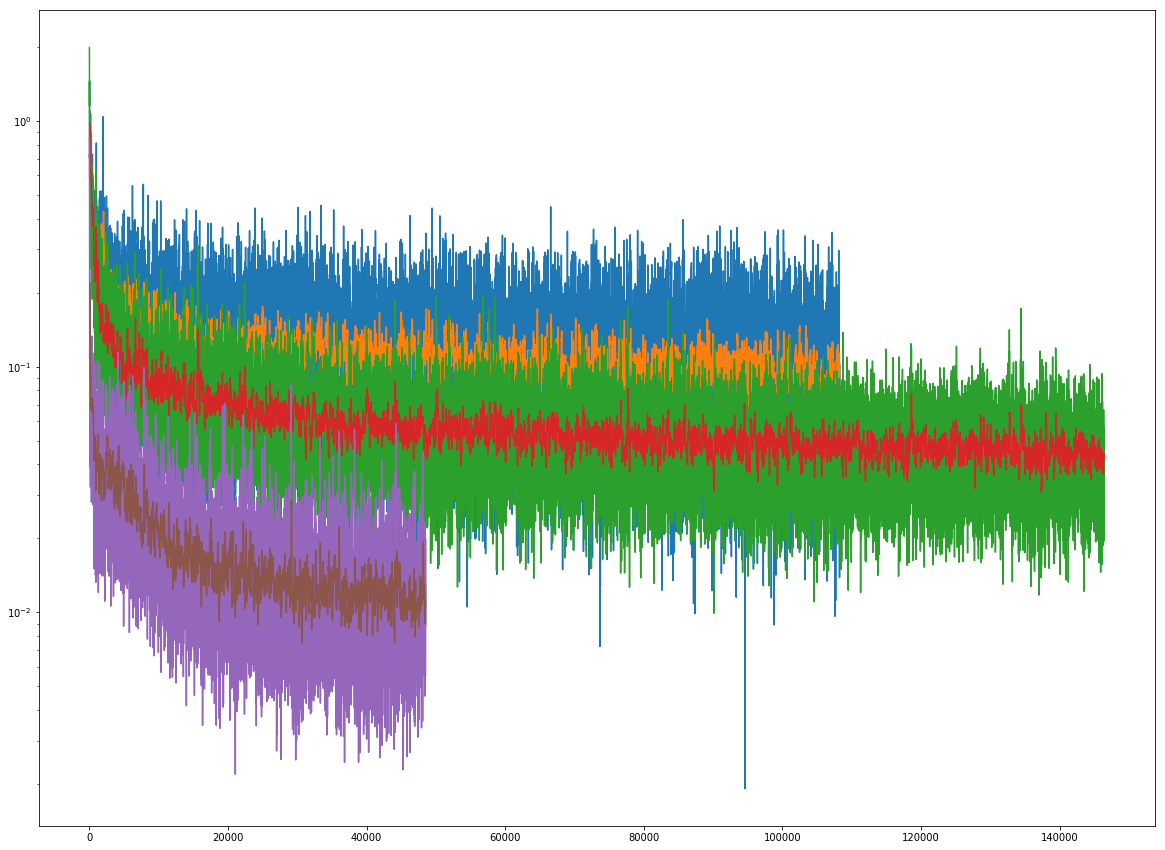

In [40]:
inD = "/groups/kainmueller/home/maisl/workspace/neurolight/experiments"
#inD = "/groups/kainmueller/home/maisl/workspace/patch_instance_segmentation/experiments"
exps = [#'setup01_030419_00', 
        #'setup02_030419_00', 
        #'setup03_030419_00', 
        #'setup04_070419_00', 
        #'setup05_070419_01',
        'setup06_070419_00',
        'setup07_070419_00',
        #'setup01_040419_00',
        #'setup08_080419_00',
        #'setup09_090419_00',
        'setup10_090419_00',
        #'setup11_100419_00',
        #'setup03_080419_00',
       ]
fls = ["train.log", 'train2.log']

plt.figure(figsize=(20,15))
plt.yscale('log')
for exp in exps:
    loss = []
    for fl in fls:
        if not os.path.isfile(os.path.join(inD, exp, fl)):
            continue
        with open(os.path.join(inD, exp, fl), 'r') as logF:
            for ln in logF:
                if "Train process" not in ln:
                    if "INFO:gunpowder.tensorflow.nodes.predict:loss: " in ln:
                        try:
                            ls = float(ln.split("loss: ")[1])
                        except:
                            continue
                        loss.append(ls)
                    continue
                try:
                    ls = float(ln.split("loss=")[1].split(" time=")[0])
                except:
                    continue
                loss.append(ls)
            print(len(loss))
            #if ("2" in fl or "3" in fl) and len(loss) > 10000:
            #    loss = loss[:170000]
            #else:
            #    loss = loss[:100000]
            #if "2" in fl and False:
            #    loss = loss[38000:]
    #loss=loss[100:]
    loss = pd.Series(loss).rolling(10).mean()
    #loss = loss.clip(0.0001, 1.0)
    lossMn = pd.Series(loss).rolling(100).mean()

    plt.plot(loss)
    plt.plot(lossMn)
plt.show()